# Exercise 5: PCA 

**PCA (Principal Component Analysis)** is an unsupervised orthogonal linear transformation technique that aims to find the directions of maximum variance or minimum projection error in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one. 

As an example, if we had three features, we could obtain three principal components, PC1, PC2 and PC3. If PC3 is the principal component that contributes the least to the total variance (lowest explained variance), it could be rejected and data would be projected onto a two-dimensional dataset where PC1 and PC2 are the new features. **The maximum number components is equal to the number of variables in the original dataset**. 

PCA is really sensitive to scaling. It measures variance depending on distances of features to a center. If variables have different scales, it will be difficult for the algorithm to calculate distances properly. For that reason, we will scale our data by subtracting the mean image from all images to each of the images.

In order to obtain the most relevant PCAs, the algorithm should follow the next steps:
1. **Scale data**: if data is not scaled, distances could be wrongly calculated and therefore, variances wrongly obtained as well. In this case, we will **subtract the mean from all images to every image**.
2. Obtain the **covariance matrix**.
3. Obtain the **eigenvectors** (the principal components) and the corresponding **eigenvalues** (the magnitude of the principal component). Eigenvectors represent the directions of maximum variance. 
4. **Sort eigenvalues** in descending order and **choose the k eigenvectors** that correspond with the **k largest eigenvalues** where k is the number of dimensions of the new feature subspace (k<=d).
5. **Project data into the new k-dimensional feature subspace**. 

## 1. Load data

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#function to scale image pixel values
def disparity_normalization(disp): # disp is an array in uint8 data type
        # disp_norm = cv2.normalize(src=disp, dst= disp, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX)
        _min = np.amin(disp)
        _max = np.amax(disp)
        #disp_norm = disp - _min * 255.0 / (_max - _min)
        disp_norm = (disp - _min) * 255.0 / (_max - _min)
        disp_norm = np.uint8(disp_norm)

        return disp_norm 

In [3]:
df_si = pd.read_csv("sindex-normtime-mean2Method.txt")
df_si_log = pd.read_csv("sindex-logNormtime-mean2Method 2.txt")
df_si

,f_ext,sindex
0,AF03SAS.JPG,-1.0
1,AF07SAS.JPG,-1.0
2,AF10SAS.JPG,-1.0
3,AF11SAS.JPG,-1.0
4,AF13SAS.JPG,-1.0
...,...,...
310,AF07_HAS.JPG,NaN
311,AM31_HAS.JPG,NaN
312,BF26_HAS.JPG,NaN
313,BM35_HAS.JPG,NaN


In [4]:
df_si_log

,f_ext,sindex
0,AF03SAS.JPG,-1.0
1,AF10SAS.JPG,-1.0
2,AF11SAS.JPG,-1.0
3,AF13SAS.JPG,-1.0
4,AF16SAS.JPG,-1.0
...,...,...
310,AF07_HAS.JPG,NaN
311,AM31_HAS.JPG,NaN
312,BF26_HAS.JPG,NaN
313,BM35_HAS.JPG,NaN


In [5]:
path_happy = "/Users/helenasofiayabenlopezosa/Documents/Master/Cognitive Modelling/HA-SD-images/Happy"
path_sad = "/Users/helenasofiayabenlopezosa/Documents/Master/Cognitive Modelling/HA-SD-images/Sad"

In [6]:
y = []
x = []

data_folders = [path_happy, path_sad]

for path in data_folders:

    for item in os.listdir(path):
        
       # df_si['sindex'][df_si['f_ext'] == item].values
        
        if item in df_si['f_ext'].values:
            
            if np.isnan(df_si['sindex'][df_si['f_ext'] == item].values[0]) == False and df_si['sindex'][df_si['f_ext'] == item].values[0] != np.nan:
            
                name_file = os.path.join(path,item)

                #read in grayscale
                img = cv2.imread(name_file, cv2.IMREAD_GRAYSCALE)

                x.append(img.flatten())

                #to reverse flattening (img.flatten().reshape(img.shape))
                y.append(df_si['sindex'][df_si.f_ext == item].values[0])

#create dataframe with pixel values as columns
df = pd.DataFrame(x) 

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,428234,428235,428236,428237,428238,428239,428240,428241,428242,428243
0,134,134,134,133,132,131,132,132,133,132,...,77,74,80,81,84,80,78,79,77,72
1,134,135,135,134,134,135,136,137,135,136,...,75,81,85,83,86,91,88,88,92,93
2,146,146,145,143,142,144,145,144,144,146,...,87,79,77,78,79,77,75,79,80,76
3,140,139,134,135,136,136,140,140,134,135,...,70,71,71,71,71,71,70,70,67,68
4,140,139,144,143,146,143,144,140,146,142,...,96,102,101,98,90,80,82,87,91,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,131,130,131,132,131,128,128,132,127,129,...,59,66,76,80,84,78,78,75,75,73
263,138,135,135,140,141,139,137,138,138,139,...,74,79,83,87,84,84,77,80,82,84
264,132,132,132,127,134,131,133,135,133,132,...,68,70,70,72,67,68,68,73,79,79
265,142,139,139,138,138,140,140,143,140,139,...,60,63,66,67,66,64,63,63,62,66


In [8]:
#original shape of the images
shape_img = img.shape

## 2. Apply PCA

In [9]:
#mean_image
mean_image = np.array(df.mean())

#subtract mean image to every image
df_pca = df.copy() - df.copy().mean()

In [10]:
#dataframe with labels
df_wl = df.copy()
df_wl['label'] = y

df_wl['label'][df_wl['label'] >= 0] = 1
df_wl['label'][df_wl['label'] < 0] = -1

df_wl

<ipython-input-10-bbe4bde8f67b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl['label'][df_wl['label'] >= 0] = 1
<ipython-input-10-bbe4bde8f67b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl['label'][df_wl['label'] < 0] = -1


,0,1,2,3,4,5,6,7,8,9,...,428235,428236,428237,428238,428239,428240,428241,428242,428243,label
0,134,134,134,133,132,131,132,132,133,132,...,74,80,81,84,80,78,79,77,72,1.0
1,134,135,135,134,134,135,136,137,135,136,...,81,85,83,86,91,88,88,92,93,1.0
2,146,146,145,143,142,144,145,144,144,146,...,79,77,78,79,77,75,79,80,76,1.0
3,140,139,134,135,136,136,140,140,134,135,...,71,71,71,71,71,70,70,67,68,1.0
4,140,139,144,143,146,143,144,140,146,142,...,102,101,98,90,80,82,87,91,92,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,131,130,131,132,131,128,128,132,127,129,...,66,76,80,84,78,78,75,75,73,-1.0
263,138,135,135,140,141,139,137,138,138,139,...,79,83,87,84,84,77,80,82,84,-1.0
264,132,132,132,127,134,131,133,135,133,132,...,70,70,72,67,68,68,73,79,79,-1.0
265,142,139,139,138,138,140,140,143,140,139,...,63,66,67,66,64,63,63,62,66,-1.0


In [11]:
#Principal Component Analysis
D = 100
pca = PCA(n_components=D, random_state = 2)
pca.fit_transform(df_pca)

#project data into new feature space
df_PCA = pca.transform(df_pca)
df_PCA = pd.DataFrame(df_PCA)

#obtain original shape
df_PCA_inverse = pca.inverse_transform(df_PCA)

cev = pca.explained_variance_ratio_.cumsum()

dic_pca = {'PC': list(range(1, len(pca.explained_variance_ratio_) + 1)), 'var':pca.explained_variance_ratio_, 'cm': cev}

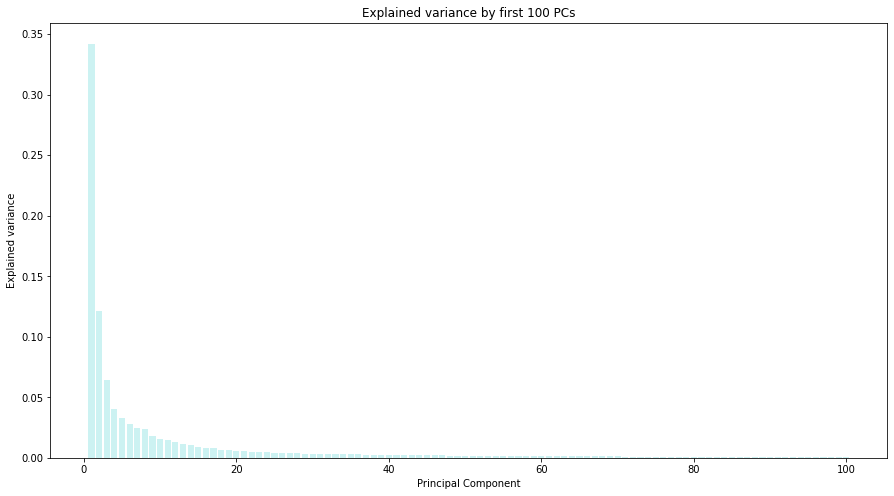

In [12]:
#plot of explained variance
plt.figure(figsize=(15,8))
plt.locator_params(axis="y", nbins=12)
plt.bar(dic_pca['PC'], dic_pca['var'], alpha=0.2, 
        align='center', label='explained variance', color='c')
plt.xlabel('Principal Component')
plt.ylabel('Explained variance')
plt.title('Explained variance by first 100 PCs')
plt.savefig('explained_variance_5.png')
plt.show()


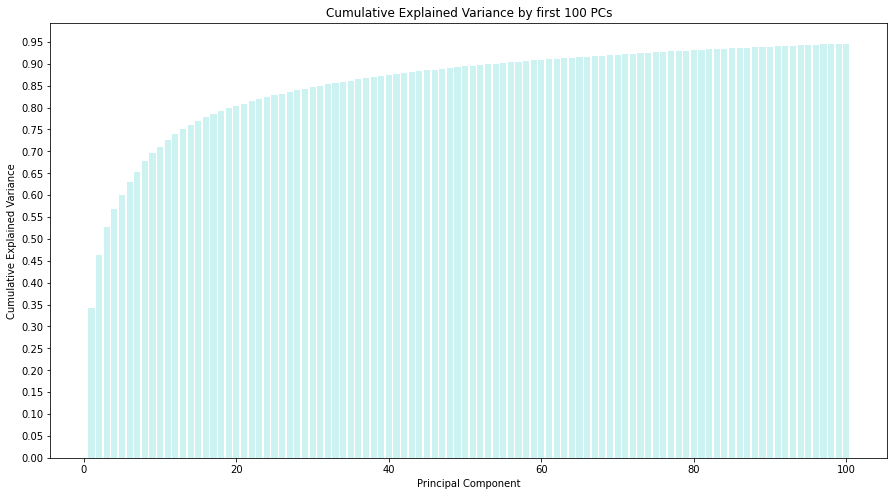

In [13]:
#plot of explained variance
plt.figure(figsize=(15,8))
plt.locator_params(axis="y", nbins=20)
plt.bar(dic_pca['PC'], dic_pca['cm'], alpha=0.2,
        align='center', label='explained variance', color='c')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by first 100 PCs')
plt.savefig('cumulative_explained_variance_5.png')
plt.show()

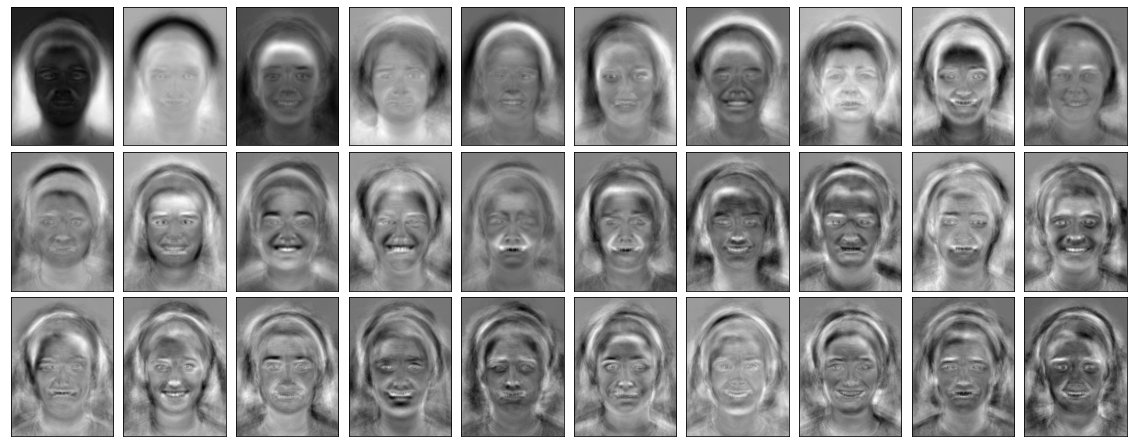

In [14]:
#Plot first 30 eigenvectors not being added to the mean image 
fig, axes = plt.subplots(3,10,figsize=(20,8),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape((762, 562)), cmap = 'gray')
    
    
plt.savefig('pc_nomean.png')

By plotting the first 30 eigenvectors we can analyze those areas in the images that provide the highest variance among them. In this case we can interpret the first eigenvectors (the left and uppermost images) as different kinds of lighting. This conclusion provides us with useful information for pre-processing since we should have images with similar lighting so it is not interpreted as a feature by the model.

As we move on, we see that the components are more related to facial features such as the eyebrows,  and the mouth.

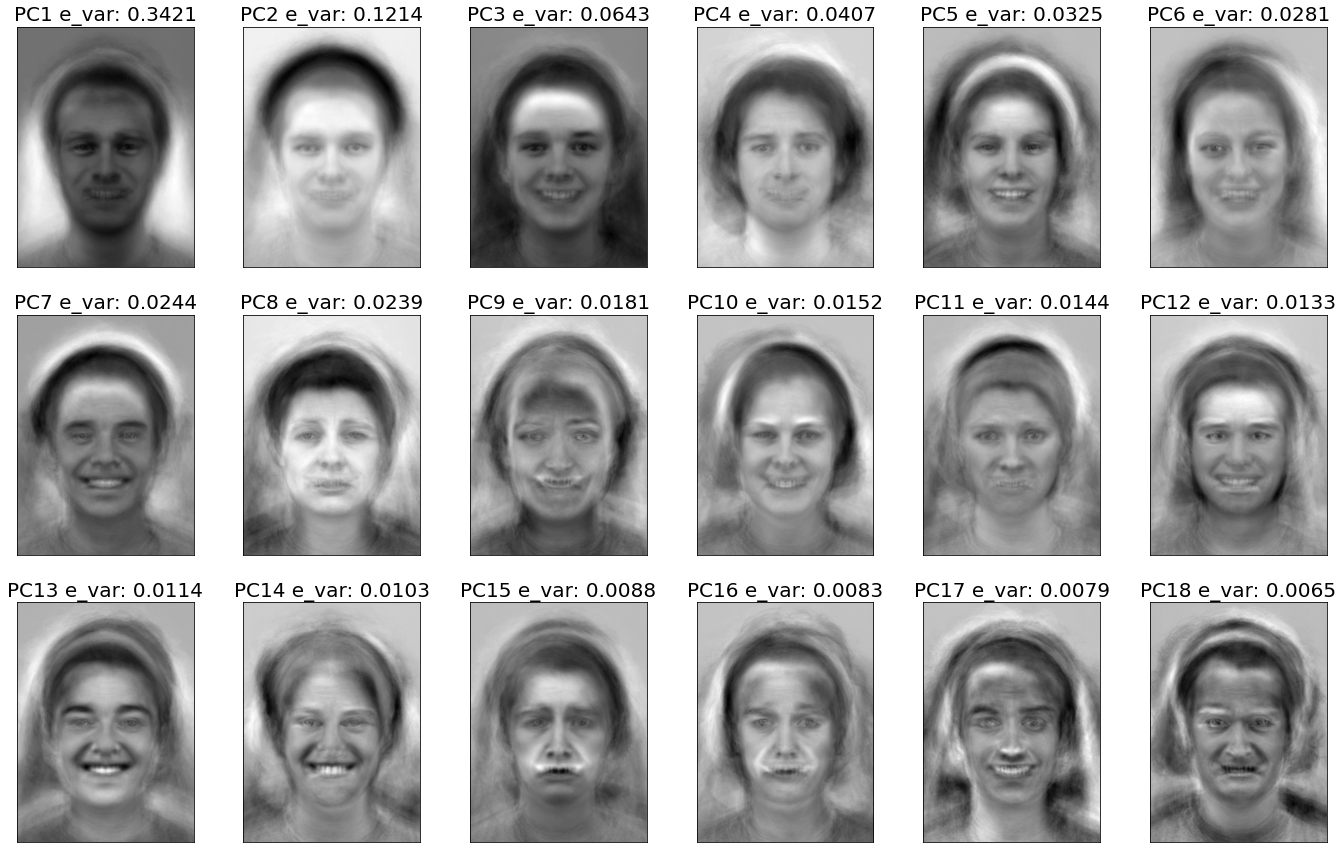

In [15]:
#Plot first 30 eigenvectors
fig, axes = plt.subplots(3,6,figsize=(24,15),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.2, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(disparity_normalization(pca.components_[i].reshape((762, 562))) + mean_image.reshape((762, 562)), cmap = 'gray')
    ax.set_title('PC' + str(i + 1) + " e_var: " +  str(round(dic_pca['var'][i], 4)) , fontsize = 20)
    plt.savefig('pc_mean.png')
    

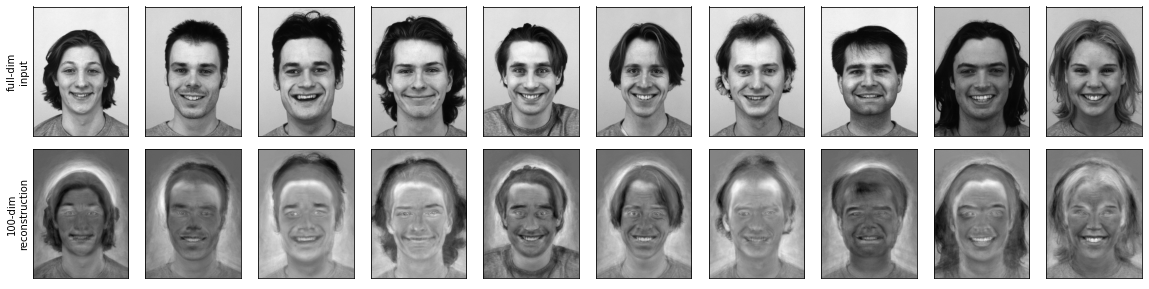

In [16]:
# Plot original vs transformed images
fig, ax = plt.subplots(2, 10, figsize=(20, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(x[i].reshape((762, 562)), cmap='binary_r')
    ax[1, i].imshow(df_PCA_inverse[i].reshape((762, 562)), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');

plt.savefig('before_after_pca.png')


# Exercise 6: Forward feature selection

Here we will implement our own forward feature selection method. In this case we will measure the performance of a multilinear regression model in terms of R-squared and Root Mean Square Error . R-square represents the proportion of the variance of the dependent variable that is explained by the independent variable, while the root mean square error represents the standard deviation of the error.

In [17]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size = 0.2, random_state = 42)

# PCA 1 r2 0.007151539490969605, explained variance is 0.32332358933514166and root mean squared error is 0.9322796039793669
# PCA 2 r2 0.009042655815208644, explained variance is 0.45050945744056026and root mean squared error is 0.9331038848699442
# PCA 3 r2 0.010816324619061546, explained variance is 0.5191955990265847and root mean squared error is 0.9337359845826556
# PCA 4 r2 0.036257207435195005, explained variance is 0.5629613429726836and root mean squared error is 0.9454584725787376
# PCA 5 r2 0.006659264419302935, explained variance is 0.5962557154435889and root mean squared error is 0.9310417249380156
# PCA 6 r2 0.014529181794124236, explained variance is 0.6250732306133041and root mean squared error is 0.9343895667843013
# PCA 7 r2 0.023475866353167386, explained variance is 0.6496895372803713and root mean squared error is 0.9168520885380037
# PCA 8 r2 0.003148019519620604, explained variance is 0.6735314835158666and root mean squared error is 0.9296097905553189
# PCA 9 r2 0.0

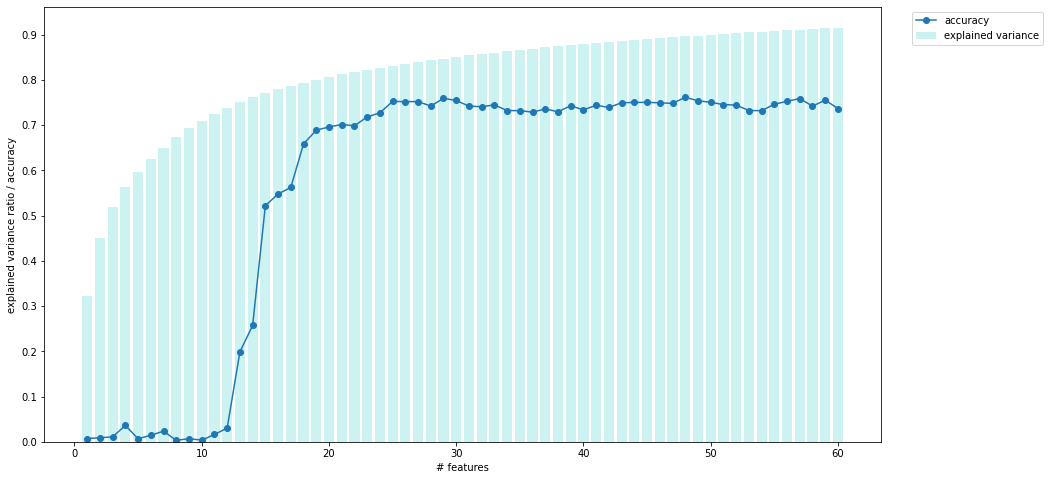

In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

cv_accuracy = [] 
mse = []
cv_ev=[]

n_components_max = 60
    
cv_accuracy_i=[]
ev_i=[]

for i in range(1, n_components_max + 1):

    #Obtain PCA components for this split and apply dimensionality reduction
    pca = PCA(n_components=i, random_state = 2).fit(X_train)
    ev_i.append(np.sum(pca.explained_variance_ratio_))
    X_train_pca = pca.transform(X_train)

    #Train the model
    model = LinearRegression()
    model.fit(X_train_pca, y_train)

    #CV scores
    cv_results = cross_validate(model, X_train_pca, y_train, scoring=["r2", 'neg_root_mean_squared_error'])
    cv_accuracy_i.append(abs(np.mean(cv_results['test_r2'])))
    mse.append(abs(np.mean(cv_results['test_neg_root_mean_squared_error'])))

    print('# PCA '+ str(i)+ ' r2 ' + str(cv_accuracy_i[i-1]) +', explained variance is ' +
     str(ev_i[i-1]) + 'and root mean squared error is ' + str(mse[i-1]))

print("")
cv_accuracy.append(cv_accuracy_i)
cv_ev.append(ev_i)

#Print best result
#print("\033[1m\nThe number of PC which provides the highest cv r2 for Multiple Linear Regression is:\033[0m", cv_accuracy[0].index(sorted(cv_accuracy[0], reverse = True)[0]) + 1, cv_accuracy[0].index(sorted(cv_accuracy[0], reverse = True)[0]) + 2)
    
plt.figure(figsize=(15,8))
plt.locator_params(axis="y", nbins=15)


plt.bar([i for i in range(1,len(cv_ev[0]) + 1,1)], cv_ev[0], alpha=0.2,
        align='center', label='explained variance', color='c')
plt.plot([i for i in range(1,len(cv_ev[0]) + 1,1)],cv_accuracy[0],'-o', label = 'accuracy')
plt.xlabel('# features')
plt.ylabel('explained variance ratio / accuracy')
plt.legend(bbox_to_anchor=(1.2, 1),loc='upper right')
plt.savefig('forward_feature_selection.png')
plt.show()



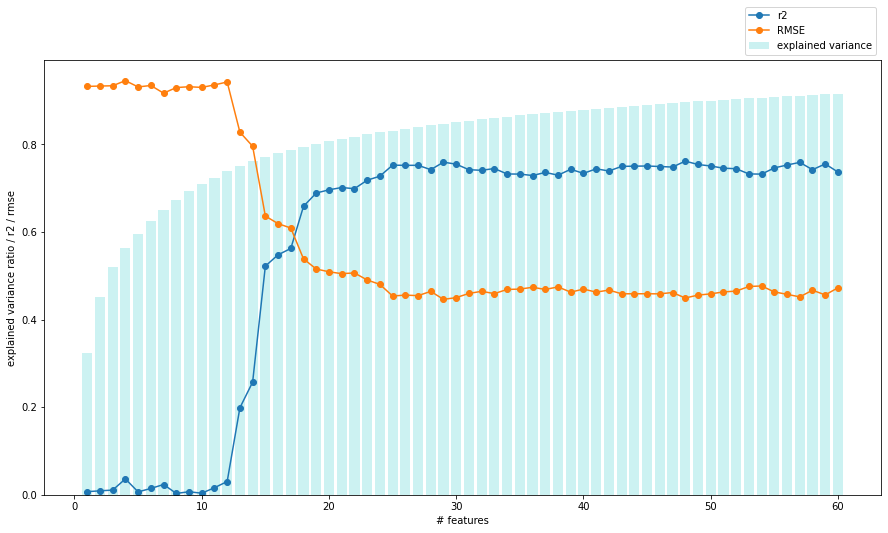

In [19]:
plt.figure(figsize=(15,8))


plt.bar([i for i in range(1,len(cv_ev[0]) + 1,1)], cv_ev[0], alpha=0.2,
        align='center', label='explained variance', color='c')
plt.plot([i for i in range(1,len(cv_ev[0]) + 1,1)],cv_accuracy[0],'-o', label = 'r2')
plt.plot([i for i in range(1,len(cv_ev[0]) + 1,1)],mse,'-o', label = 'RMSE')
plt.xlabel('# features')
plt.ylabel('explained variance ratio / r2 / rmse')
plt.legend(bbox_to_anchor=(1, 1),loc='lower right')
plt.savefig('forward_feature_selection.png')
plt.show()

# Exercise 7: Linear regression model synthetic continuum

Now we first need to construct the linear regression model with the optimal number of principal components we have obtained in the previous exercise. After fitting the model, we will generate a continuum of 7 images. Five of them will span the strength index range, and one more will expand this range in each of the limits. 

In [20]:
from sklearn.metrics import r2_score
from sklearn import metrics

#Obtain PCA components for this split and apply dimensionality reduction
pca = PCA(n_components=25, random_state = 2).fit(X_train)
ev_i.append(np.sum(pca.explained_variance_ratio_))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#Train the model
model = LinearRegression()
model.fit(X_train_pca, y_train)

#CV scores
cv_results = cross_validate(model, X_train_pca, y_train, scoring=["r2", 'neg_root_mean_squared_error'])

#Predict values
y_pred = model.predict(X_test_pca)

print("Intercept of the model is: ", model.intercept_)
print("Coefficients of the model are: ", model.coef_)
print("Cross validation R2 score is: ",np.mean(cv_results['test_r2']))
print("Cross validation RMSE score is: ",np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Test R2 score is: ", r2_score(y_test, y_pred))
print("Test RMSE score is: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Intercept of the model is:  0.07343507832318096
Coefficients of the model are:  [ 5.35561541e-06 -6.36034429e-06  1.90269090e-05  2.29859458e-07
 -4.41731128e-05 -7.13552503e-06  5.47554730e-05 -2.24761097e-05
 -3.45318484e-05  3.12129370e-05 -2.38950857e-06 -2.82746132e-05
  1.70768671e-04  1.01749712e-04  2.14097555e-04 -6.09959848e-05
 -5.94414539e-05 -1.52096468e-04 -7.39800011e-05  4.22404253e-05
  5.84691291e-05  1.87357767e-05  6.85758924e-05 -9.16273110e-05
 -1.09136899e-04]
Cross validation R2 score is:  0.7525345320824639
Cross validation RMSE score is:  -0.45377592591814847
Test R2 score is:  0.8306557003868158
Test RMSE score is:  0.38176654727310005


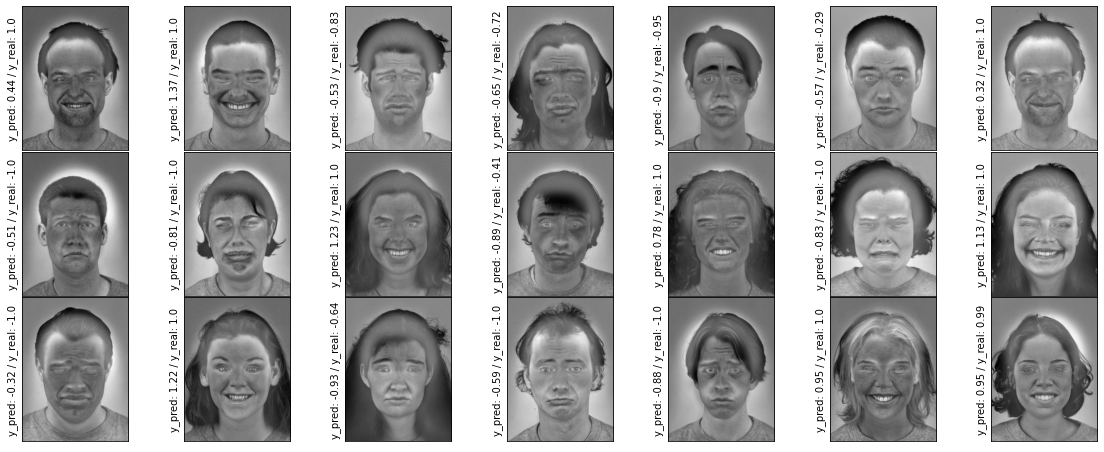

In [21]:
#Plot first 10 eigenvectors
fig, axes = plt.subplots(3,7,figsize=(20,8),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test.iloc[i].values.reshape((762, 562)), cmap = 'gray')
    ax.set_ylabel('y_pred: '+ str(round(y_pred[i], 2)) + ' / y_real: '+ str(round(y_test[i], 2)))

plt.savefig('y_Test_pred.png')

In order to generate the synthetic continuum of images from the fitted model, one way is to select a vector $x$ so that

$$x = \alpha\beta$$

where $\beta$ is the slope vector whose dimension equals the number of selected Principal Components, and $\alpha$ is a real number. Then, by substituting in the equation 

$$y = x\beta + \delta = (\alpha\beta)\beta + \delta = \\ \alpha||\beta||^{2} + \delta\$$

Then we can obtain the desired vector $x$ given a known $y$ by computing $\alpha$

$$\alpha = \frac{y - \delta}{||\beta||^{2}}$$

In [22]:
def synthetic_image(sindex, intercept, coefficients):
    alpha =  (sindex - intercept)/ np.sum(np.square(coefficients))
    x = alpha*coefficients 
        
    return pca.inverse_transform(x).reshape((762, 562))

In [24]:
continuum_8 = []

max_range = 1
min_range = -1
n_images = 4

distance = (max_range - min_range)/n_images

product = [-1, 0, 1, 2, 3, 4, 5]

continuum_8 = []

for item in product:

    continuum_8.append(synthetic_image((min_range + item*distance), model.intercept_, model.coef_))

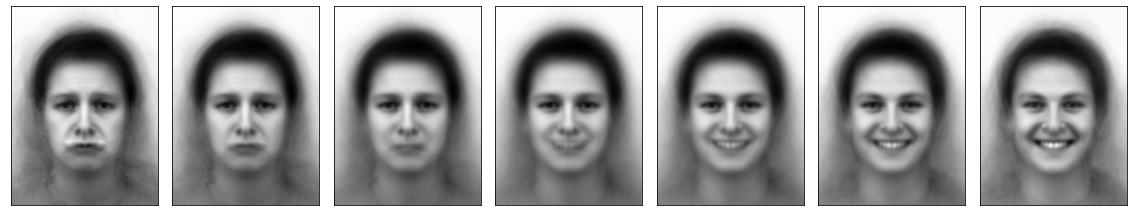

In [32]:
#Plot first 10 eigenvectors
fig, axes = plt.subplots(1,len(continuum_8),figsize=(20,8),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(continuum_8[i] + mean_image.reshape((762, 562)), cmap = 'gray')

plt.savefig('continuum_linear.png')

# Exercise 8: Generating synthetic images from mean images

In exercise 9 we need to generate seven images from the mean images in a 7-point scale that lies in the plane between these two images. We will create this 7-point scale for each of the pixels this way:

$$ | ==== | \text{Mean Sad} | ==== | ==== | ==== | \text{Mean Happy} | ==== | $$

So we will create 7 synthetic images that lie in each of these parts.

In [27]:
continuum = []

mean_sad = np.array(df_wl[df_wl.columns[:-1]][df_wl.label == -1].mean())

mean_happy = np.array(df_wl[df_wl.columns[:-1]][df_wl.label == 1].mean())

distance = (mean_happy - mean_sad)/4

product = [-1, 0, 1, 2, 3, 4, 5]    

for element in product:
    continuum.append(mean_sad + element*distance)

continuum_df = pd.DataFrame(continuum)
continuum_df

,0,1,2,3,4,5,6,7,8,9,...,428234,428235,428236,428237,428238,428239,428240,428241,428242,428243
0,138.347427,138.102151,138.239736,138.408929,138.557607,138.333971,138.427081,138.403909,138.521977,138.440453,...,72.212388,72.384983,72.260771,72.884505,73.678178,74.233507,74.525914,74.764792,74.838091,74.67185
1,138.039370,137.803150,137.834646,138.000000,138.173228,138.015748,138.110236,138.125984,138.204724,138.102362,...,72.291339,72.393701,72.354331,72.881890,73.519685,73.842520,74.007874,74.188976,74.220472,74.15748
2,137.731313,137.504148,137.429556,137.591071,137.788850,137.697525,137.793391,137.848060,137.887472,137.764272,...,72.370290,72.402418,72.447891,72.879274,73.361192,73.451533,73.489834,73.613161,73.602854,73.64311
3,137.423256,137.205146,137.024466,137.182143,137.404471,137.379303,137.476547,137.570135,137.570219,137.426181,...,72.449241,72.411136,72.541451,72.876659,73.202700,73.060546,72.971794,73.037345,72.985236,73.12874
4,137.115200,136.906145,136.619376,136.773214,137.020093,137.061080,137.159702,137.292210,137.252967,137.088091,...,72.528192,72.419854,72.635011,72.874044,73.044207,72.669558,72.453754,72.461530,72.367618,72.61437
5,136.807143,136.607143,136.214286,136.364286,136.635714,136.742857,136.842857,137.014286,136.935714,136.750000,...,72.607143,72.428571,72.728571,72.871429,72.885714,72.278571,71.935714,71.885714,71.750000,72.10000
6,136.499086,136.308141,135.809196,135.955357,136.251336,136.424634,136.526012,136.736361,136.618462,136.411909,...,72.686094,72.437289,72.822132,72.868813,72.727222,71.887584,71.417674,71.309899,71.132382,71.58563


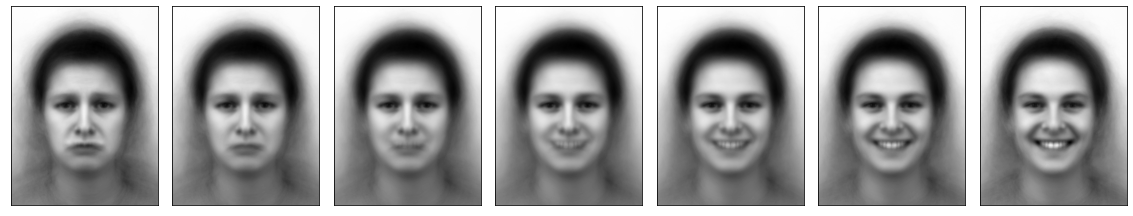

In [28]:
#Plot continuum
fig, axes = plt.subplots(1,7,figsize=(20,8),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(continuum[i].reshape((762, 562)), cmap = 'gray')

plt.savefig('continuum_simpler.png')

In [29]:
#Principal Component Analysis with 50 features to get get 90% of the explained variance
D = 51
pca = PCA(n_components=D, random_state = 2)
pca.fit_transform(df_pca)

#project data into new feature space
df_PCA = pca.transform(df_pca)
df_PCA = pd.DataFrame(df_PCA)

#obtain original shape
df_PCA_inverse = pca.inverse_transform(df_PCA)
df_PCA_inverse = pd.DataFrame(df_PCA_inverse)

cev = pca.explained_variance_ratio_.cumsum()

dic_pca = {'PC': list(range(len(pca.explained_variance_ratio_))), 'var':pca.explained_variance_ratio_, 'cm': cev}

In [30]:
df_PCA_inverse['label'] = y 

continuum_pca = []

mean_sad_pca = np.array(df_PCA_inverse[df_PCA_inverse.columns[:-1]][df_PCA_inverse.label == -1].mean())

mean_happy_pca = np.array(df_PCA_inverse[df_PCA_inverse.columns[:-1]][df_PCA_inverse.label == 1].mean())

distance_pca = (mean_happy_pca - mean_sad_pca)/4

for element in product:
    continuum_pca.append(mean_sad_pca + element*distance_pca)

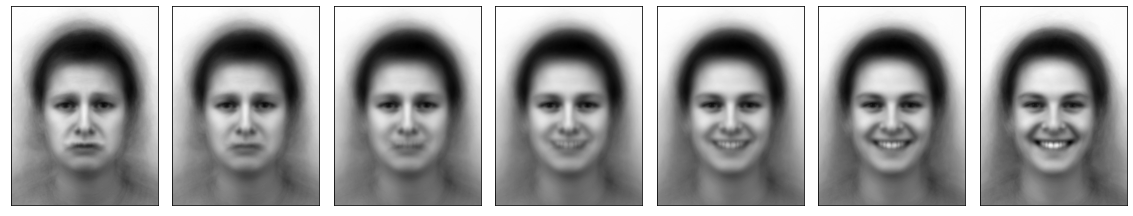

In [31]:
#Plot continuum after PCA processing
fig, axes = plt.subplots(1,7,figsize=(20,8),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(continuum_pca[i].reshape((762, 562)) + mean_image.reshape((762, 562)), cmap = 'gray')
    plt.savefig('continuum_simpler_pca.png')

## Exercise 10: Experiment #2

In [36]:
results_2 = pd.read_csv("results_2.txt", header = None)
results_1 = pd.read_csv("results_1.txt", header = None)
results_2

,0,1,2
0,2,s7_3.png,4
1,2,s5_8.png,4
2,2,pca6_6.png,5
3,2,pca1_7.png,1
4,2,s5_9.png,3
...,...,...,...
206,2,c6_9.png,4
207,2,pca2_8.png,1
208,2,c7_8.png,5
209,2,pca7_7.png,4


In [78]:
linear_dict = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
simpler_dict = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
pca_dict = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}

for element in results_2[1].values:
    if element.startswith('s'):
        simpler_dict[int(list(element)[1])].append(results_2[2][results_2[1]== element].values[0])
        
    elif element.startswith('c'):
        linear_dict[int(list(element)[1])].append(results_2[2][results_2[1]== element].values[0])
    
    elif element.startswith('pca'):
        pca_dict[int(list(element)[3])].append(results_2[2][results_2[1]== element].values[0])


for element in results_1[1].values:
    if element.startswith('s'):
        simpler_dict[int(list(element)[1])].append(results_1[2][results_1[1]== element].values[0])
        
    elif element.startswith('c'):
        linear_dict[int(list(element)[1])].append(results_1[2][results_1[1]== element].values[0])
    
    elif element.startswith('pca'):
        pca_dict[int(list(element)[3])].append(results_1[2][results_1[1]== element].values[0])


In [116]:
pca_dict[3] = pca_dict[3][:-1]

In [117]:
df_linear = pd.DataFrame(linear_dict)
df_simpler = pd.DataFrame(simpler_dict)
df_pcar = pd.DataFrame(pca_dict)

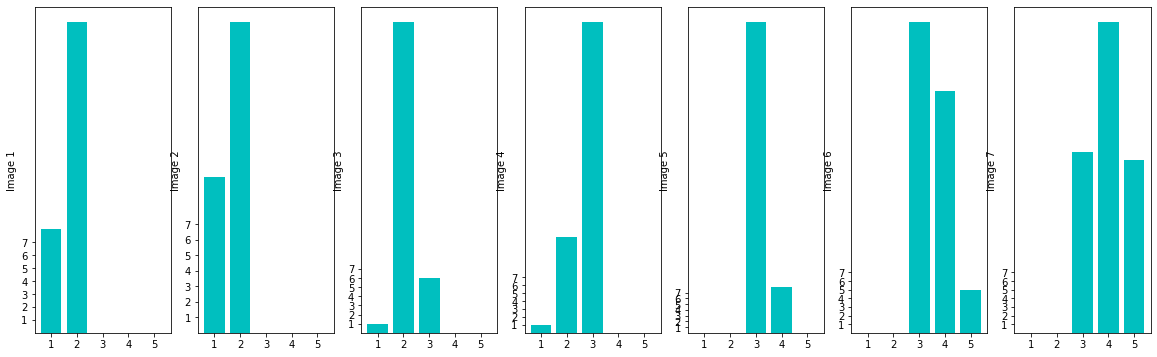

In [141]:
fig, axes = plt.subplots(1,7,figsize=(20,6),subplot_kw={'xticks':[1, 2, 3, 4, 5], 'yticks':[1, 2, 3, 4, 5, 6, 7]},
 gridspec_kw=dict(hspace=0.01, wspace=0.2))

for i, ax in enumerate(axes.flat):
    ax.bar(list(range(1,6)), [df_linear[i + 1][df_linear[i + 1] == 1].sum(), df_linear[i + 1][df_linear[i + 1] == 2].sum(), df_linear[i + 1][df_linear[i + 1] == 3].sum(), df_linear[i + 1][df_linear[i + 1] == 4].sum(), df_linear[i + 1][df_linear[i + 1] == 5].sum()], color='c')
    ax.set_ylabel("Image " + str(i+1))

plt.savefig('linear_ex.png')

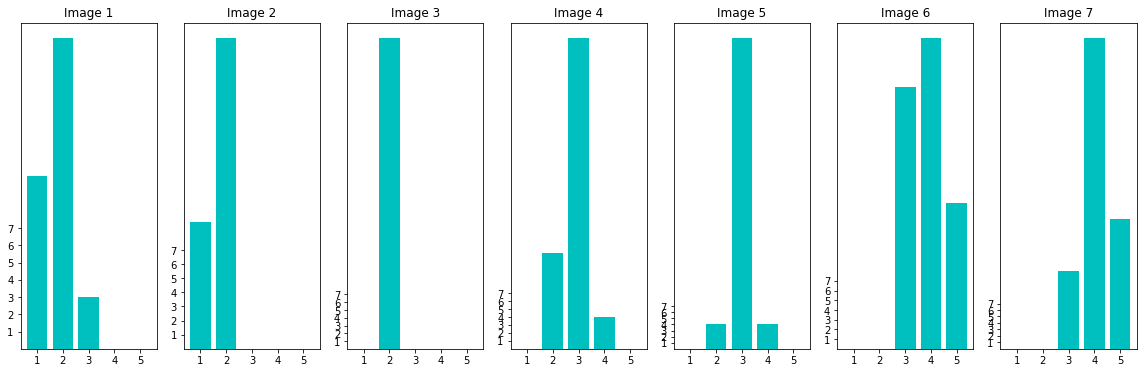

In [144]:
fig, axes = plt.subplots(1,7,figsize=(20,6),subplot_kw={'xticks':[1, 2, 3, 4, 5], 'yticks':range()},
 gridspec_kw=dict(hspace=0.01, wspace=0.2))

for i, ax in enumerate(axes.flat):
    ax.bar(list(range(1,6)), [df_simpler[i + 1][df_simpler[i + 1] == 1].sum(), df_simpler[i + 1][df_simpler[i + 1] == 2].sum(), df_simpler[i + 1][df_simpler[i + 1] == 3].sum(), df_simpler[i + 1][df_simpler[i + 1] == 4].sum(), df_simpler[i + 1][df_simpler[i + 1] == 5].sum()], color='c')
    ax.set_title("Image " + str(i+1))


plt.savefig('continuum_ex.png')

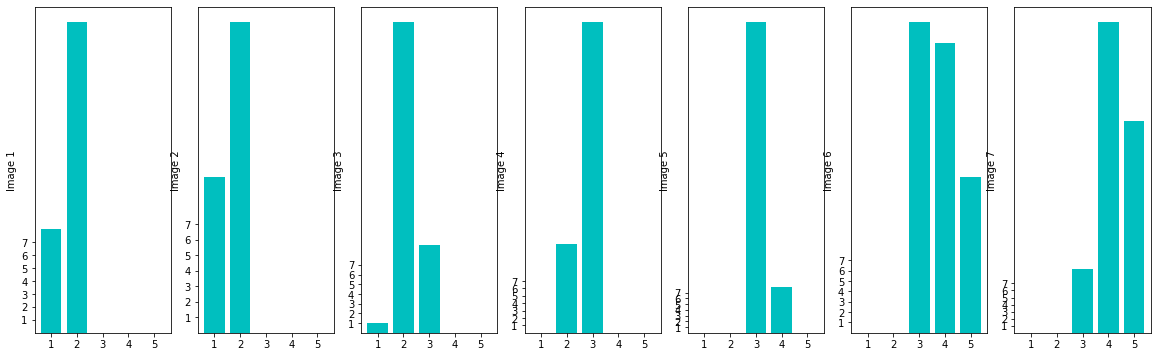

In [143]:
fig, axes = plt.subplots(1,7,figsize=(20,6),subplot_kw={'xticks':[1, 2, 3, 4, 5], 'yticks':[1, 2, 3, 4, 5, 6, 7]},
 gridspec_kw=dict(hspace=0.01, wspace=0.2))

for i, ax in enumerate(axes.flat):
    ax.bar(list(range(1,6)), [df_pcar[i + 1][df_pcar[i + 1] == 1].sum(), df_pcar[i + 1][df_pcar[i + 1] == 2].sum(), df_pcar[i + 1][df_pcar[i + 1] == 3].sum(), df_pcar[i + 1][df_pcar[i + 1] == 4].sum(), df_pcar[i + 1][df_pcar[i + 1] == 5].sum()], color='c')
    ax.set_ylabel("Image " + str(i+1))

plt.savefig('pca_ex.png')

In [138]:
wrong_linear = 0

for element in df_linear.columns:
    if element == 1:
        for i in df_linear[1].values:
            if i != 1:
                wrong_linear += 1
    if element == 2:
        for i in df_linear[2].values:
            if i != 1 and i != 2:
                wrong_linear += 1
    if element == 3:
        for i in df_linear[3].values:
            if i != 2 and i != 3:
                wrong_linear += 1
    if element == 4:
        for i in df_linear[4].values:
            if i != 3:
                wrong_linear += 1
    if element == 5:
        for i in df_linear[5].values:
            if i != 3 and i != 4:
                wrong_linear += 1       
    if element == 6:
        for i in df_linear[6].values:
            if i != 4 and i != 5:
                wrong_linear += 1
    if element == 7:
        for i in df_linear[7].values:
            if i != 5:
                wrong_linear += 1
                
print(wrong_linear)

48


In [139]:
wrong_simpler = 0

for element in df_simpler.columns:
    if element == 1:
        for i in df_simpler[1].values:
            if i != 1:
                wrong_simpler += 1
    if element == 2:
        for i in df_simpler[2].values:
            if i != 1 and i != 2:
                wrong_simpler += 1
    if element == 3:
        for i in df_simpler[3].values:
            if i != 2 and i != 3:
                wrong_simpler += 1
    if element == 4:
        for i in df_simpler[4].values:
            if i != 3:
                wrong_simpler += 1
    if element == 5:
        for i in df_simpler[5].values:
            if i != 3 and i != 4:
                wrong_simpler += 1       
    if element == 6:
        for i in df_simpler[6].values:
            if i != 4 and i != 5:
                wrong_simpler += 1
    if element == 7:
        for i in df_simpler[7].values:
            if i != 5:
                wrong_simpler += 1
                
print(wrong_simpler)

44


In [140]:
wrong_pca = 0

for element in df_pcar.columns:
    if element == 1:
        for i in df_pcar[1].values:
            if i != 1:
                wrong_pca += 1
    if element == 2:
        for i in df_pcar[2].values:
            if i != 1 and i != 2:
                wrong_pca += 1
    if element == 3:
        for i in df_pcar[3].values:
            if i != 2 and i != 3:
                wrong_pca += 1
    if element == 4:
        for i in df_pcar[4].values:
            if i != 3:
                wrong_pca += 1
    if element == 5:
        for i in df_pcar[5].values:
            if i != 3 and i != 4:
                wrong_pca += 1       
    if element == 6:
        for i in df_pcar[6].values:
            if i != 4 and i != 5:
                wrong_pca += 1
    if element == 7:
        for i in df_pcar[7].values:
            if i != 5:
                wrong_pca += 1
                
print(wrong_pca)

43
